In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [3]:
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/iris.data')
df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2
145,6.3,2.5,5.0,1.9,2
146,6.5,3.0,5.2,2.0,2
147,6.2,3.4,5.4,2.3,2


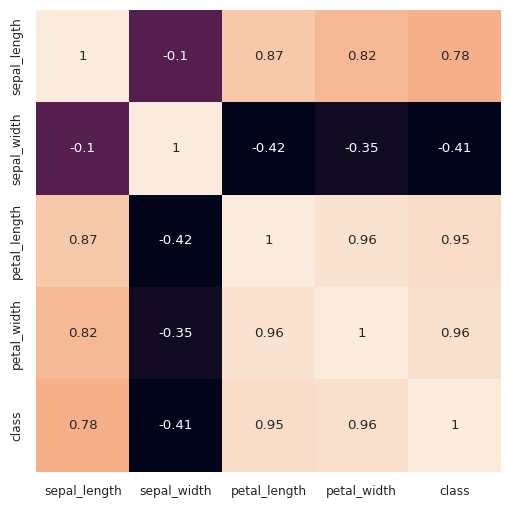

In [6]:
df_corr=df.corr()

#히트맵
plt.figure(figsize=(6,6))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [8]:
x= df.drop('class',axis=1)
x

,sepal_length,sepal_width,petal_length,petal_width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4
...,...,...,...,...
144,6.7,3.0,5.2,2.3
145,6.3,2.5,5.0,1.9
146,6.5,3.0,5.2,2.0
147,6.2,3.4,5.4,2.3


In [11]:
y = x['petal_width']

In [13]:
x= x.drop(columns=['petal_width'],axis=1)

In [14]:
x

,sepal_length,sepal_width,petal_length
0,4.9,3.0,1.4
1,4.7,3.2,1.3
2,4.6,3.1,1.5
3,5.0,3.6,1.4
4,5.4,3.9,1.7
...,...,...,...
144,6.7,3.0,5.2
145,6.3,2.5,5.0
146,6.5,3.0,5.2
147,6.2,3.4,5.4


In [15]:
Y = pd.get_dummies(y).values

In [18]:
X = x.values
X

array([[4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4],
       [5.4, 3.9, 1.7],
       [4.6, 3.4, 1.4],
       [5. , 3.4, 1.5],
       [4.4, 2.9, 1.4],
       [4.9, 3.1, 1.5],
       [5.4, 3.7, 1.5],
       [4.8, 3.4, 1.6],
       [4.8, 3. , 1.4],
       [4.3, 3. , 1.1],
       [5.8, 4. , 1.2],
       [5.7, 4.4, 1.5],
       [5.4, 3.9, 1.3],
       [5.1, 3.5, 1.4],
       [5.7, 3.8, 1.7],
       [5.1, 3.8, 1.5],
       [5.4, 3.4, 1.7],
       [5.1, 3.7, 1.5],
       [4.6, 3.6, 1. ],
       [5.1, 3.3, 1.7],
       [4.8, 3.4, 1.9],
       [5. , 3. , 1.6],
       [5. , 3.4, 1.6],
       [5.2, 3.5, 1.5],
       [5.2, 3.4, 1.4],
       [4.7, 3.2, 1.6],
       [4.8, 3.1, 1.6],
       [5.4, 3.4, 1.5],
       [5.2, 4.1, 1.5],
       [5.5, 4.2, 1.4],
       [4.9, 3.1, 1.5],
       [5. , 3.2, 1.2],
       [5.5, 3.5, 1.3],
       [4.9, 3.1, 1.5],
       [4.4, 3. , 1.3],
       [5.1, 3.4, 1.5],
       [5. , 3.5, 1.3],
       [4.5, 2.3, 1.3],
       [4.4, 3.2

In [19]:
y

0      0.2
1      0.2
2      0.2
3      0.2
4      0.4
      ... 
144    2.3
145    1.9
146    2.0
147    2.3
148    1.8
Name: petal_width, Length: 149, dtype: float64

In [20]:
Y

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [22]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape,

((119, 3), (119, 22), (30, 3), (30, 22))

In [29]:
#Defining the model

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

def model_fn(a_layer=None):

    model = keras.Sequential()
    model.add(Dense(3, input_shape=(3,), activation='tanh'))
    model.add(Dense(10, activation='tanh'))
    model.add(Dense(10, activation='tanh'))
    if a_layer:
      model.add(a_layer)
    model.add(keras.layers.Dense(1))
    return model

In [30]:
model = model_fn()

model.compile(optimizer = 'rmsprop', loss ='mse',metrics=['mse'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 3)                 12        
                                                                 
 dense_9 (Dense)             (None, 10)                40        
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 173 (692.00 Byte)
Trainable params: 173 (692.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
4/4 [==============================] - 0s 46ms/step - loss: 0.1983 - mse: 0.1983 - val_loss: 0.0461 - val_mse: 0.0461
Epoch 2/10
4/4 [==============================] - 0s 22ms/step - loss: 0.1664 - mse: 0.1664 - val_loss: 0.0455 - val_mse: 0.0455
Epoch 3/10
4/4 [==============================] - 0s 20ms/step - loss: 0.1763 - mse: 0.1763 - val_loss: 0.0446 - val_mse: 0.0446
Epoch 4/10
4/4 [==============================] - 0s 18ms/step - loss: 0.1717 - mse: 0.1717 - val_loss: 0.0446 - val_mse: 0.0446
Epoch 5/10
4/4 [==============================] - 0s 22ms/step - loss: 0.1493 - mse: 0.1493 - val_loss: 0.0443 - val_mse: 0.0443
Epoch 6/10
4/4 [==============================] - 0s 18ms/step - loss: 0.1566 - mse: 0.1566 - val_loss: 0.0451 - val_mse: 0.0451
Epoch 7/10
4/4 [==============================] - 0s 21ms/step - loss: 0.1329 - mse: 0.1329 - val_loss: 0.0454 - val_mse: 0.0454
Epoch 8/10
4/4 [==============================] - 0s 25ms/step - loss: 0.1318 - mse: 0.1318 - val

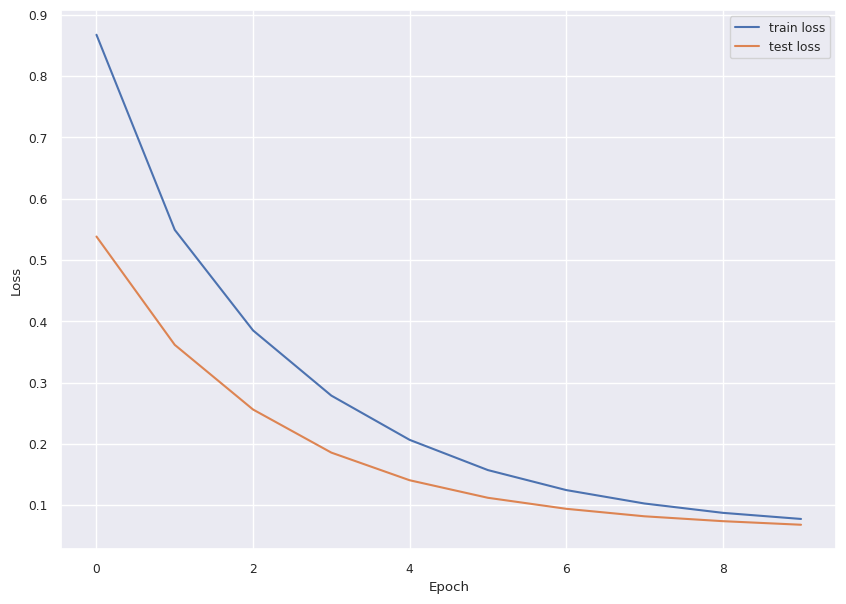

In [32]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 179ms/step - loss: 0.0680 - mse: 0.0680


[0.06795752793550491, 0.06795752793550491]

In [70]:
# 두 콜백을 함께 사용

N_EPOCHS = 20

model = model_fn(keras.layers.Dropout(0.2))
model.compile(optimizer='rmsprop', loss='mse',
              metrics=['mse'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(x=X_train,y=y_train, epochs=N_EPOCHS, verbose=0,
                    validation_data=(X_test, y_test),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [71]:
print(early_stopping_cb.stopped_epoch)

13


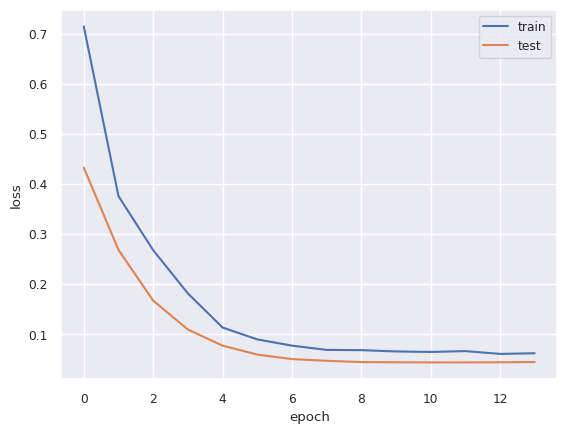

In [72]:
# 훈련 손실과 검증 손실 출력

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])
plt.show()

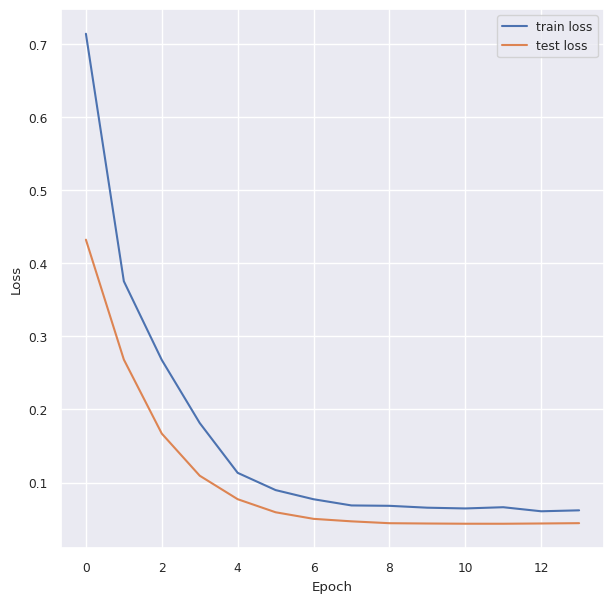

In [74]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.plot(range(len(history.history['loss'])), history.history['loss'], label='train loss')
plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [75]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 47ms/step - loss: 0.0435 - mse: 0.0435


[0.04352912679314613, 0.04352912679314613]